# Gradient Descent with numpy

In [4]:
import numpy as np
import matplotlib.pyplot as plt 

## 1) Intuitive Explanation

Gradient Descent is an iterative optimization algorithm used to find the minimum of a function. It follows these steps:

1. Initialize parameters (often randomly).
2. Compute the gradient (the vector of first-order derivatives) to see how the function is changing locally.
3. Update parameters by moving in the opposite direction of the gradient, scaled by a learning rate (α). The learning rate controls both the convergence speed and the ability to actually reach the minimum.
4. Repeat this process until convergence, i.e., until the parameter updates become very small or a maximum number of iterations is reached.

Because the Mean Squared Error (MSE) is a convex function, gradient descent is guaranteed to converge to the global minimum (if the learning rate is well chosen).

## 2) Mathematical Formulation

We consider a simple linear regression model:  

$$
\hat{y}^{(i)} = w x^{(i)} + b
$$  



**Cost function (Mean Squared Error, MSE):**  

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$$  

where:  
- $m$ = number of training samples  
- $y^{(i)}$ = true value  
- $\hat{y}^{(i)}$ = predicted value  


**Gradients:**  

$$
\frac{\partial J}{\partial w} = \frac{2}{m} \sum_{i=1}^{m} \left( (w x^{(i)} + b) - y^{(i)} \right) x^{(i)}
$$  

$$
\frac{\partial J}{\partial b} = \frac{2}{m} \sum_{i=1}^{m} \left( (w x^{(i)} + b) - y^{(i)} \right)
$$  



**Update rules:**  

$$
w := w - \alpha \cdot \frac{\partial J}{\partial w}
$$  

$$
b := b - \alpha \cdot \frac{\partial J}{\partial b}
$$  

where $\alpha$ is the learning rate.  

## 3) Data Generation

In [57]:
m = 100
X = 10 * np.random.rand(m)
vrai_theta0 = 4
vrai_theta1 = 3
bruit = np.random.randn(m)  # bruit gaussien standard
y = vrai_theta0 + vrai_theta1 * X + bruit
X_biais = np.c_[np.ones((m, 1)), X.reshape(m, 1)]  # forme (m, 2)

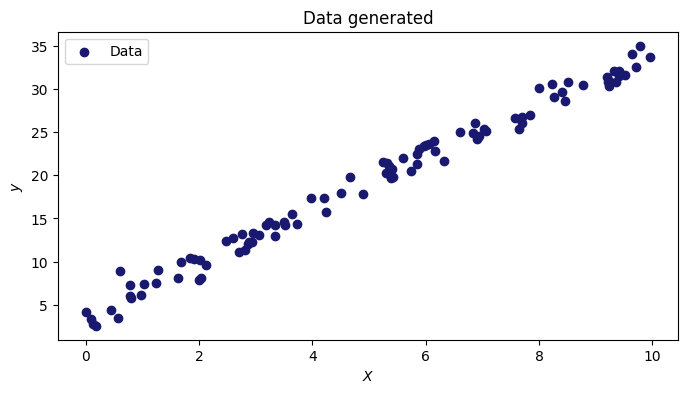

In [58]:
plt.figure(figsize=(8,4))
plt.scatter(X, y, color='midnightblue', label = "Data")
plt.title("Data generated")
plt.xlabel('$X$')
plt.ylabel("$y$")
plt.legend()
plt.show()

## 4) Gradient Descent Algorithm 

In [59]:
def loss_function(theta, X, y):
    """  Compute the cost J(theta) = (1/2m) * sum((X*theta - y)^2)"""
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    return (1/2*m)*np.dot(errors, errors)

In [60]:
def gradient_descent(X, y, alpha, n_iterations):
    """ 
    Execute descent gradient.
    X: matrix (m, 2) including one bias column
    y: vector (m, 1)
    alpha: Learning rate
    n_iterations: nb of iterations
    Return theta (vector 2, ) and cost history
    """
    m = len(y)
    theta = np.zeros(2)
    cost_history = []
    
    for i in range(n_iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta = theta - alpha * gradients
        cost = loss_function(theta, X, y)
        cost_history.append(cost)
        
        if (i + 1) % 100 == 0:
            print(f"Iteration {i+1:4d} — Cost: {cost:.4f}")
        
        # Stop if the cost is not decreasing significantly
        if i > 0 and abs(cost_history[-1] - cost_history[-2]) < 1e-8:
            print(f"Converged after {i+1} iterations")
            break

    return theta, cost_history

In [61]:
# Gradient descent parametor
alpha = 0.01      # learning rate
n_iterations = 1000  # nb iterations

In [64]:
theta_opt, history = gradient_descent(X_biais, y, alpha, n_iterations)

Iteration  100 — Cost: 14273.4776
Iteration  200 — Cost: 10772.1122
Iteration  300 — Cost: 8636.2705
Iteration  400 — Cost: 7333.4018
Iteration  500 — Cost: 6538.6487
Iteration  600 — Cost: 6053.8473
Iteration  700 — Cost: 5758.1172
Iteration  800 — Cost: 5577.7212
Iteration  900 — Cost: 5467.6791
Iteration 1000 — Cost: 5400.5532


## 5) Printing result

In [65]:
print("\nParamètres optimisés :")
print(f"θ0 = {theta_opt[0]:.4f}")
print(f"θ1 = {theta_opt[1]:.4f}")


Paramètres optimisés :
θ0 = 3.6504
θ1 = 3.0680


## 6) Data visualisation: data + model

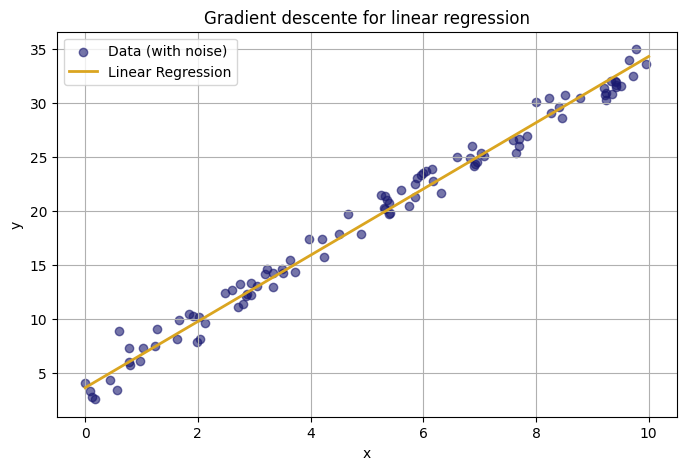

In [68]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="midnightblue", label="Data (with noise)", alpha=0.6)
x_tracé = np.array([0, 10])
y_tracé = theta_opt[0] + theta_opt[1] * x_tracé
plt.plot(x_tracé, y_tracé, color='goldenrod', linewidth=2, label="Linear Regression")
plt.title("Gradient descente for linear regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()